## preliminary stuff

In [1]:
cd /g/data/jk72/deg581/ROMS_example/

/g/data/jk72/deg581/ROMS_example


In [2]:
# load modules
## Data processing and DA modules
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
## Dealing with big data and netcdf
import xarray as xr
from netCDF4 import Dataset
## ROMS packages
from xgcm import Grid
## color maps
import cmaps
import cmocean
## mapping packages
import cartopy.crs as ccrs
import cartopy.feature as cfeature
## System tools and python configuration
import os
import glob
import repackage
repackage.add('../../')
repackage.add('../')

import warnings
warnings.filterwarnings("ignore")

## load our freshly run model output and make the vertical coordinate

In [12]:
# load single ROMS netcdf with xr
ds = xr.open_dataset('roms_his.nc')


In [13]:

Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
z_rho = (ds.zeta) + ((ds.zeta) + ds.h) * Zo_rho
Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
z_w = Zo_w * ((ds.zeta) + ds.h) + (ds.zeta)
print('making vertical coordinates')
    
ds.coords['z_rho'] = z_rho.transpose('ocean_time', 's_rho', 'eta_rho', 'xi_rho')
ds.coords['z_w'] = z_w.transpose('ocean_time', 's_w', 'eta_rho', 'xi_rho')


making vertical coordinates


## Notes

Notes: 
- In this model (ROMS), you can think of the xi coordinate as roughly being equivalent to the x-direction and the eta coordinate as being the y-direction.
- The _rho and _u and _v subscript refers to whether the point is at the center or face of a cell (recall from yesterday)
- u velocities are in the x-direction, v velocities are in the y-direction, w velocities in the vertical direction.


## what does the bathymetry look like?

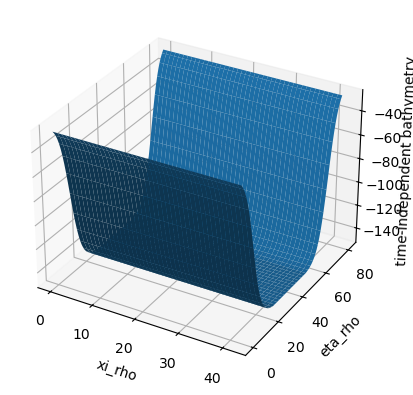

In [14]:
# surface of sea floor plot
ax = plt.figure().add_subplot(projection='3d')
(-ds.h).plot.surface(ax=ax)


## now plot the resulting variables

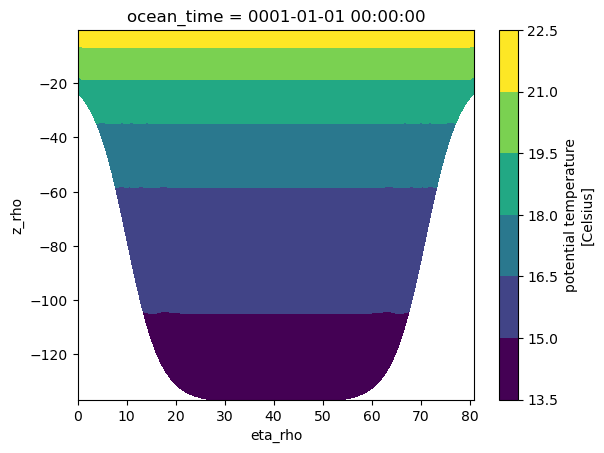

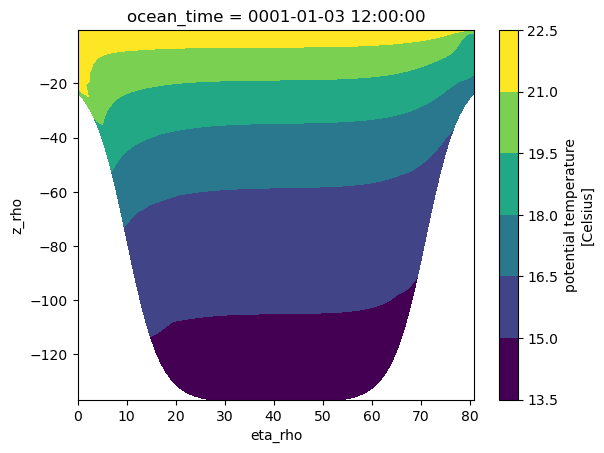

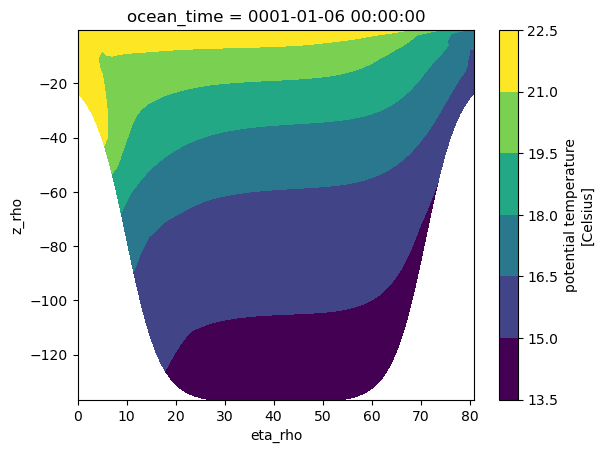

In [25]:
# plot changes in temperature field
ds.temp.isel(ocean_time=0,xi_rho=20).plot.contourf(y='z_rho')
plt.show()
ds.temp.isel(ocean_time=10,xi_rho=20).plot.contourf(y='z_rho')
plt.show()
ds.temp.isel(ocean_time=20,xi_rho=20).plot.contourf(y='z_rho')

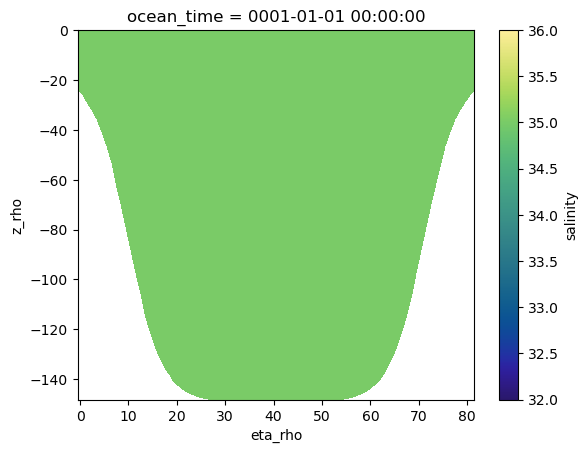

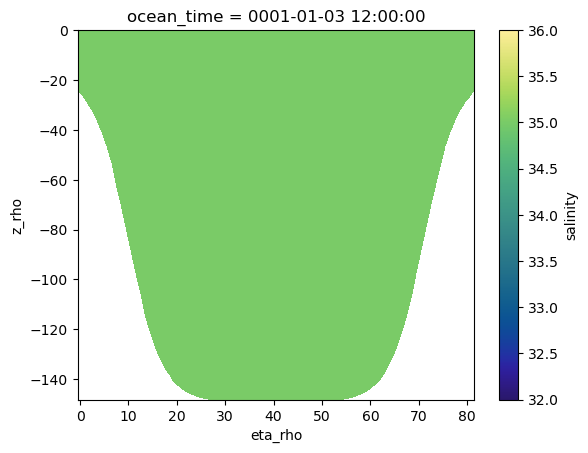

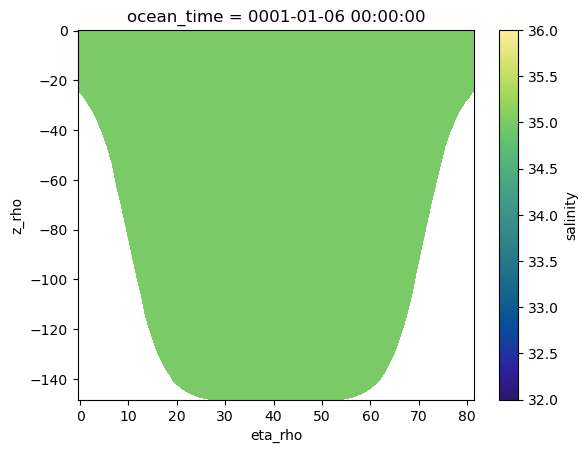

In [35]:
# plot changes in salinity field
ds.salt.isel(ocean_time=0,xi_rho=20).plot.pcolormesh(y='z_rho',cmap='cmo.haline',vmin=32,vmax=36)
plt.show()
ds.salt.isel(ocean_time=10,xi_rho=20).plot.pcolormesh(y='z_rho',cmap='cmo.haline',vmin=32,vmax=36)
plt.show()
ds.salt.isel(ocean_time=20,xi_rho=20).plot.pcolormesh(y='z_rho',cmap='cmo.haline',vmin=32,vmax=36)

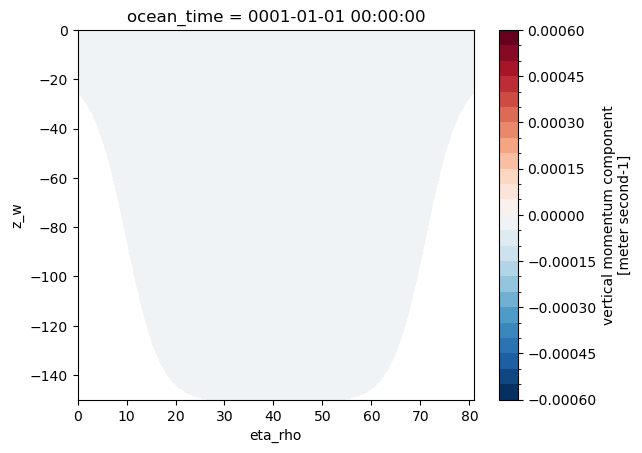

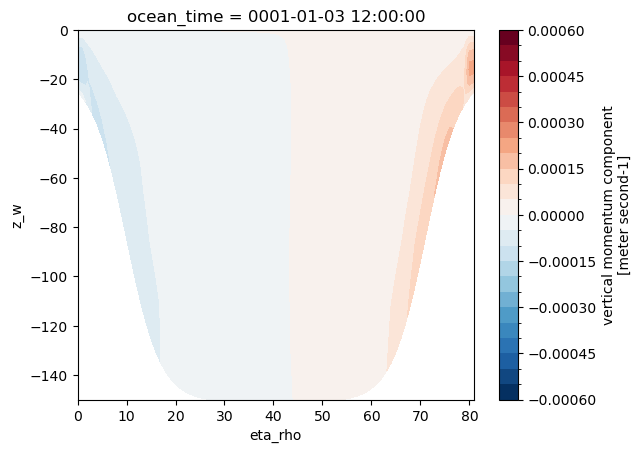

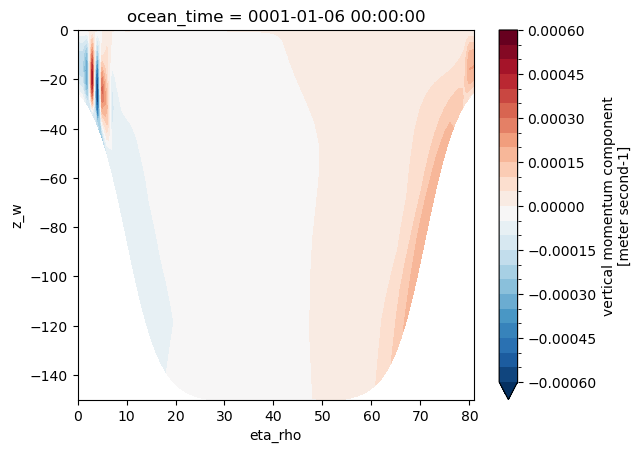

In [20]:
# plot changes in w field
ds.w.isel(ocean_time=0,xi_rho=20).plot.contourf(y='z_w',cmap='RdBu_r',levels=np.arange(-0.0006,0.00065,0.00005))
plt.show()
ds.w.isel(ocean_time=10,xi_rho=20).plot.contourf(y='z_w',cmap='RdBu_r',levels=np.arange(-0.0006,0.00065,0.00005))
plt.show()
ds.w.isel(ocean_time=20,xi_rho=20).plot.contourf(y='z_w',cmap='RdBu_r',levels=np.arange(-0.0006,0.00065,0.00005))

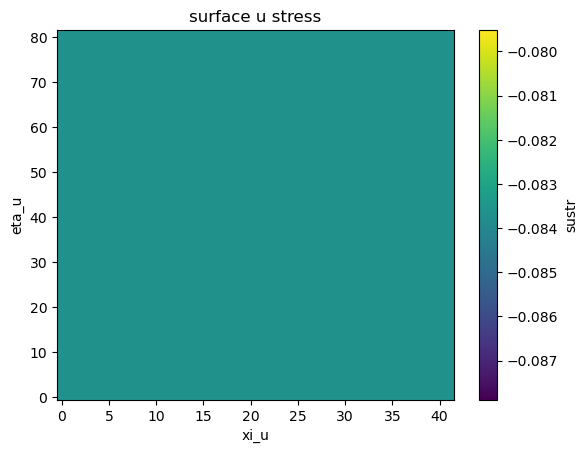

Text(0.5, 1.0, 'surface v stress')

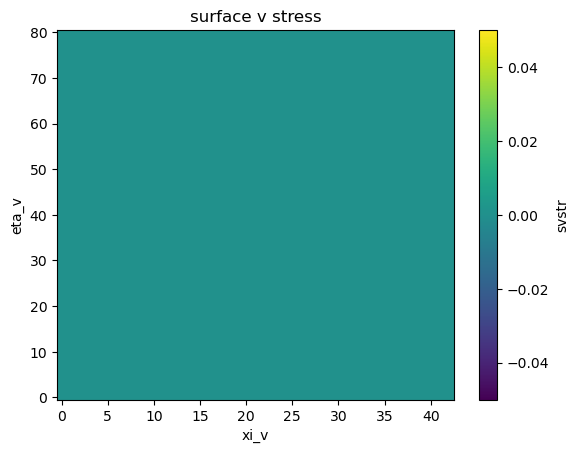

In [39]:
# plot the surface stress field
ds.sustr.mean(dim='ocean_time').plot()
plt.title('surface u stress')
plt.show()
ds.svstr.mean(dim='ocean_time').plot()
plt.title('surface v stress')
